In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 

In [2]:
f_psfws = ["size_summary_psfws_df.p", "e1_summary_psfws_df.p", "e2_summary_psfws_df.p"]
f_rand = ["size_summary_rand_df.p", "e1_summary_rand_df.p", "e2_summary_rand_df.p"]
f_randMatch = ["size_summary_randMatch_df.p", "e1_summary_randMatch_df.p", "e2_summary_randMatch_df.p"]

path = "../summariesCircle/"

size_psfws, e1_psfws, e2_psfws = [pickle.load(open(path+f_psfws[i], "rb")) for i in range(3)]
size_rand, e1_rand, e2_rand = [pickle.load(open(path+f_rand[i], "rb")) for i in range(3)]   
size_randMatch, e1_randMatch, e2_randMatch = [pickle.load(open(path+f_randMatch[i], "rb")) for i in range(3)]

In [3]:
def plothist(ax,para,clr,binn,change_axis=False,lbl=""):
    """plot histogram of para as points with poisson uncertainty"""
    y, bin_edges, _ = ax.hist(para, bins=binn, histtype='step', color="white")
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    if change_axis:
        bin_centers = [x+90 if x<90 else x-90 for x in bin_centers]
    ax.errorbar(
        bin_centers,
        y,
        yerr = y**0.5,
        marker = '.', drawstyle="steps-mid",
        linestyle ="",capsize=3, color=clr, label=lbl)
    return ax


def get_angles(size,e1,e2):
    """get angles of 2pcf"""
    para = [size['2p_dir'], e1['2p_dir'], e2['2p_dir']]
    return para


def plotAngles(paraP, paraR, paraRM, cl="olivedrab"):
    """plotting angles of 2pcf"""
    plt.rcParams['font.size'] = 17
    plt.rcParams['axes.labelsize'] = 17
    plt.rcParams["axes.titlesize"] = 17
    
    fig,ax = plt.subplots(2,3,figsize=(16,7), sharey=True, sharex=True)

    for i in range(3):
        ax[0,i] = plothist(ax[0,i], paraP[i],cl,18, change_axis=True)
        ax[1,i] = plothist(ax[1,i], paraR[i], "white",18, lbl="low speeds", change_axis=True)
        ax[1,i] = plothist(ax[1,i], paraRM[i],"k",18, lbl="match speeds", change_axis=True)

    ax[0,0].set_title("$\delta\sigma$, psf-weather-station")
    ax[1,0].set_title("$\delta\sigma$, random")
    ax[0,1].set_title("e1, psf-weather-station")
    ax[1,1].set_title("e1, random")
    ax[0,2].set_title("e2, psf-weather-station")
    ax[1,2].set_title("e2, random")
    fig.suptitle("Angles of correlation functions")


    [a.set_xlabel("Correlation function angle", labelpad=10) for a in ax[1]]
    [ax[i,0].set_ylabel("Frequency") for i in range(2)]
    ax[0,0].set_xticks(np.linspace(0,180,5))
    ax[0,0].set_xticklabels([180,135,0,45,90])
    ax[1,0].legend()

    fig.tight_layout();

    
def sine(x,A,B,C):
    return A*np.sin(x+C)+ B

def plotFit_sine(ax, para):
    """fit sinusoid to historgram and plot"""
    y, bin_edges, _ = ax.hist(para, bins=18, histtype='step', label="data", color="white")
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    #bin_centers = [x+90 if x<90 else x-90 for x in bin_centers]
    ax.errorbar(
        bin_centers,
        y,
        yerr = y**0.5,
        marker = '.', drawstyle="steps-mid",
        linestyle ="",capsize=3, color="darkseagreen")
    popt, pcov = curve_fit(sine, bin_centers, y)
    ax.plot(bin_centers, sine(bin_centers,popt[0],popt[1], popt[2]),label="sinusoid fit",color="k")
    ax.set_title(f"amplitude = {abs(popt[0]):.2f}")
    return ax

def get_autoCorr(size, e1, e2): 
    """get auto correlation"""
    para = [size["autocorr"], e1["autocorr"], e2["autocorr"]]
    return para


def get_variance_2pcf(size, e1, e2): 
    """get"""
    para = [size["2p_sig"], e1["2p_sig"], e2["2p_sig"]]
    return para


def plot_2pcf_var(width2pcfP, width2pcfR, width2pcfRM):
    fig,ax = plt.subplots(2,3,figsize=(16,7), sharey=True)
    plt.rcParams['font.size'] = 17
    plt.rcParams['axes.labelsize'] = 17
    c = ["darksalmon", "olivedrab"]
    l = ["rand", "randMatch"]

    [plothist(ax[0,i], width2pcfP[i], "steelblue",np.linspace(0,8,40), lbl="psfws") for i in range(3)]
    [plothist(ax[1,i], width2pcfR[i], "olivedrab",np.linspace(0,8,40), lbl="rand") for i in range(3)]
    [plothist(ax[1,i], width2pcfRM[i], "darkorange",np.linspace(0,8,40), lbl="randMatch") for i in range(3)]
    var_xlbls = ["var($\\delta\\sigma}$)", "var(e1)", "var(e2)"]        
    mom_xlbls = ["var($\\xi_{\\sigma}$)", "var($\\xi_{e1}$)", "var($\\xi_{e2}$)"]

    [ax[0,i].set_xlabel(var_xlbls[i]) for i in range(3)]
    [ax[1,i].set_xlabel(mom_xlbls[i]) for i in range(3)]      
    [ax[i,0].set_ylabel("Number of simulations") for i in range(2)]

    ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 1)) 
    ax[1,2].legend(loc='center left', bbox_to_anchor=(1, 1)) 

    ax[0,1].set_title("Distribution of 2pcf width", pad=15)

    fig.tight_layout();


def plotStepHist(ax,para,clr,b, lbl=""):
    """plot step histogram of para"""
    ax.hist(para, bins=b, histtype='step', color=clr, label=lbl)
    return ax

def plot_atm(atm_psfws,atm_rand,atm_randMatch):
    fig,ax = plt.subplots(1,2,figsize=(16,5))
    ax[0] = plotStepHist(ax[0], atm_psfws["dir_0"],"darksalmon",np.linspace(0,180,19),"psfws") 
    ax[0] = plotStepHist(ax[0], atm_rand["dir_0"],"steelblue",np.linspace(0,180,19), "random")

    clr=["darksalmon", "steelblue", "olivedrab"]
    lbl = ['psfws', 'rand', "randMatch"]
    [plotStepHist(ax[1], [atm_psfws, atm_rand, atm_randMatch][i]['spd_0'], clr[i], 15, lbl[i]) for i in range(3)]

    #[ax[i].set_title(["Ground layer direction", "Ground layer speed"][i]) for i in range(2)]
    ax[0].set_xlabel("Ground angle (degree)")
    ax[1].set_xlabel("Ground speed (m/s)")
    ax[0].set_ylabel("Number of occurence")
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle("Ground layer wind direction and speed")
    ;

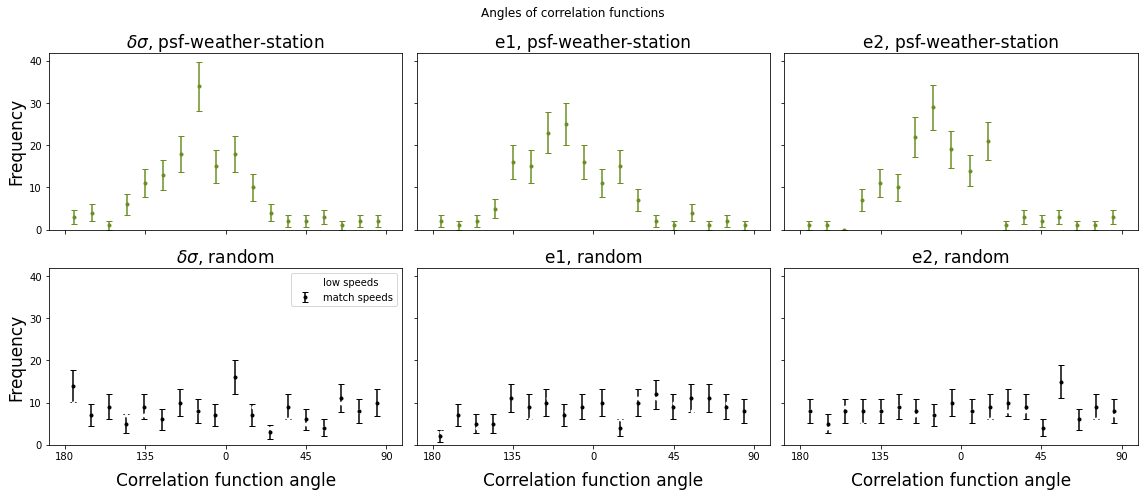

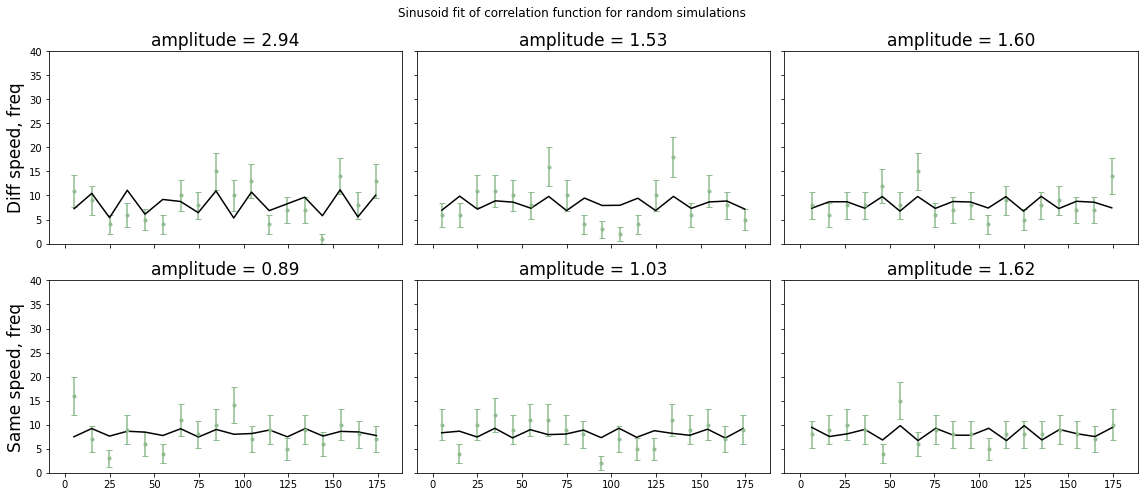

In [4]:
#Plot 2pcf angles for psfws and random sims
paraP = get_angles(size_psfws, e1_psfws, e2_psfws) 
paraR = get_angles(size_rand, e1_rand, e2_rand)
paraRM = get_angles(size_randMatch, e1_randMatch, e2_randMatch) 

plotAngles(paraP, paraR, paraRM)


#Fit sinusoid to random sims
fig, ax = plt.subplots(2,3,figsize=(16,7), sharex=True,sharey=True)
[plotFit_sine(ax[0,i],paraR[i]) for i in range(3)]
[plotFit_sine(ax[1,i],paraRM[i]) for i in range(3)]

ax[0,0].set_ylabel("Diff speed, freq")
ax[1,0].set_ylabel("Same speed, freq")
#ax[1,2].legend(loc='center left', bbox_to_anchor=(1, 1))
ax[0,0].set_ylim(ymax=40)
fig.suptitle("Sinusoid fit of correlation function for random simulations")
fig.tight_layout();

In [5]:
autocorrP = get_autoCorr(size_psfws, e1_psfws, e2_psfws) 
autocorrR = get_autoCorr(size_rand, e1_rand, e2_rand)
autocorrRM = get_autoCorr(size_randMatch, e1_randMatch, e2_randMatch) 

vars = pd.DataFrame(index=["size", "e1", "e2"])
vars['psfws'] = [np.mean(autocorrP[i]) for i in range(3)]
vars['rand'] = [np.mean(autocorrR[i]) for i in range(3)]
vars['randMatch'] = [np.mean(autocorrRM[i]) for i in range(3)]
pd.options.display.float_format = '{:,.6f}'.format
vars

,psfws,rand,randMatch
size,0.000064,0.000090,0.000053
e1,0.000060,0.000096,0.000054
e2,0.000160,0.000203,0.000135


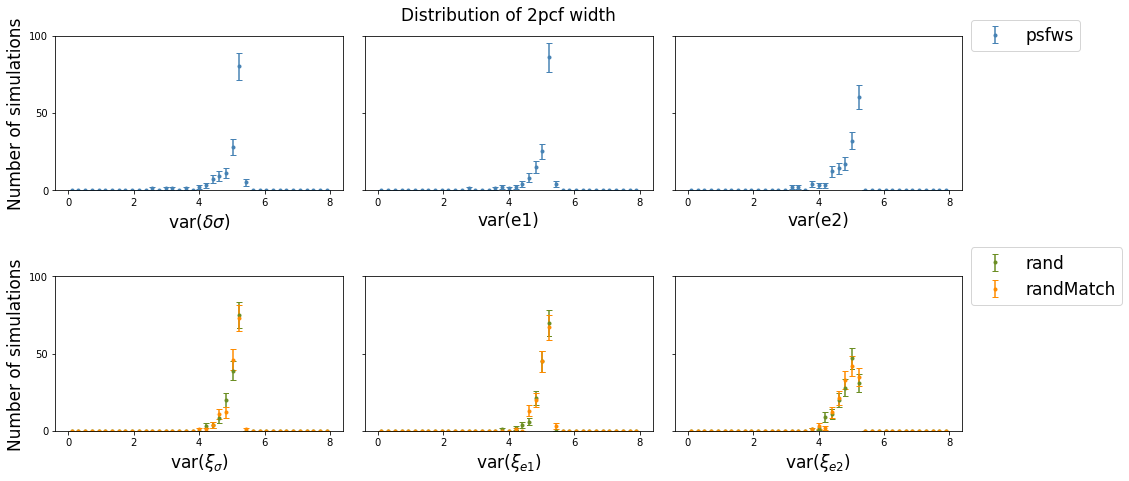

In [6]:
width2pcfP = get_variance_2pcf(size_psfws, e1_psfws, e2_psfws) 
width2pcfR = get_variance_2pcf(size_rand, e1_rand, e2_rand)
width2pcfRM = get_variance_2pcf(size_randMatch, e1_randMatch, e2_randMatch) 
plot_2pcf_var(width2pcfP, width2pcfR, width2pcfRM);


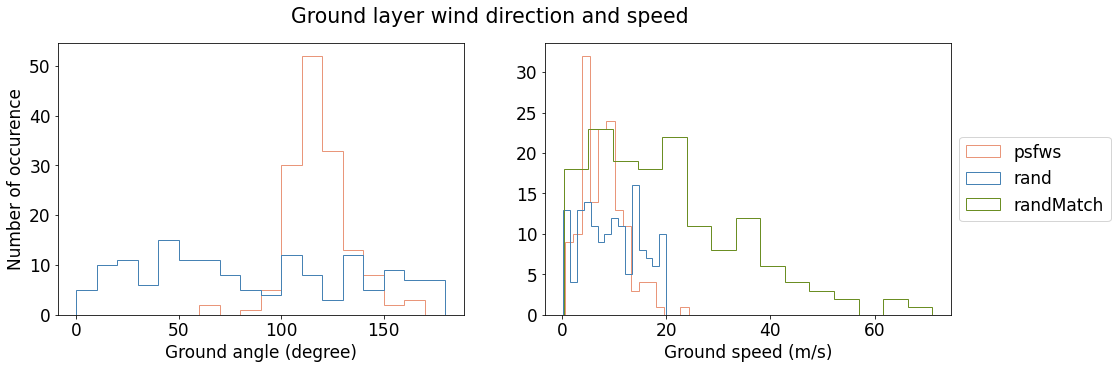

In [7]:
f_atm = ["atm_summary_psfws_df.p", "atm_summary_rand_df.p", "atm_summary_randMatch_df.p"]
atm_psfws, atm_rand, atm_randMatch = [pickle.load(open(path+f_atm[i], "rb")) for i in range(3)]

for atm in [atm_psfws, atm_rand, atm_randMatch]:
    atm['dir_0'] = [atm['direction'].iloc[i][0].deg%180 for i in range(len(atm))]
    atm['spd_0'] = [atm['speed'].iloc[i][0] for i in range(len(atm))]

plot_atm(atm_psfws,atm_rand,atm_randMatch)
